# Capstone project proposal -- Covid-19 behavior study

Since early April, Imperial College London and YouGov have been surveying people in 29 countries about their coronavirus-related behaviors and opinions. Topics include mask usage, self-isolation, working from home, vaccinations, and economic activity. The purpose of this project is to investigate whether/which kind of people's behavior would affect the spreading of COVID-19, and how people can better protect themselves and families.

Two sets of dataset were downloaded from internet:
1. The survey data about people's response in 29 countries is downloaded here: https://github.com/YouGov-Data/covid-19-tracker. 

2. The total confirmed Covid-19 cases and daily confirmed cases in population precentage by country is downloaded here: https://ourworldindata.org/covid-cases. 

With these two sets of data together, I'm trying to explore the correlation between people's response and the population rate of confirmed cases.

### Step 1: download survey data for all the 29 countries,  merge together and exported a copy of data

In [239]:
import numpy as np
import pandas as pd
import timeit

In [240]:
countries = pd.read_csv('incubator/covid19/countries.txt', header=None)

In [241]:
countrynames = countries.values

In [242]:
austrilia_data = pd.read_csv('incubator/covid19/australia.txt', index_col='RecordNo')

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [243]:
austrilia_data.columns[30:50]

Index(['i12_health_10', 'i12_health_11', 'i12_health_12', 'i12_health_13',
       'i12_health_14', 'i12_health_15', 'i12_health_16', 'i12_health_17',
       'i12_health_18', 'i12_health_19', 'i12_health_20', 'i13_health',
       'i14_health_1', 'i14_health_2', 'i14_health_3', 'i14_health_4',
       'i14_health_5', 'i14_health_6', 'i14_health_7', 'i14_health_8'],
      dtype='object')

In [244]:
austrilia_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11042 entries, 310 to 11351
Columns: 206 entries, endtime to m14_open
dtypes: float64(1), int64(5), object(200)
memory usage: 17.4+ MB


In [245]:
china_data = pd.read_csv('incubator/covid19/china.txt', index_col='RecordNo')

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [246]:
china_data.columns

Index(['endtime', 'qweek', 'i1_health', 'i2_health', 'i7a_health', 'i3_health',
       'i4_health', 'i5_health_1', 'i5_health_2', 'i5_health_3',
       ...
       'm14_5', 'm14_6', 'm14_7', 'm14_8', 'm14_9', 'm14_10', 'm14_11',
       'm14_96', 'm14_99', 'm14_open'],
      dtype='object', length=209)

In [247]:
china_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11015 entries, 0 to 11014
Columns: 209 entries, endtime to m14_open
dtypes: float64(1), int64(5), object(203)
memory usage: 17.6+ MB


In [248]:
t1 = pd.concat([austrilia_data, china_data, united_state_data], ignore_index=True, sort=False)
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33967 entries, 0 to 33966
Columns: 214 entries, endtime to employment_status_7
dtypes: float64(1), int64(5), object(208)
memory usage: 55.5+ MB


In [249]:
country_data = []
for i in range(len(countrynames)):
    country = countrynames[i]
    filename = country[0]+'.txt'
    print(filename)
    if country == 'sweden':
        data = pd.read_csv('incubator/covid19/'+filename, index_col='record')
    else: 
        data = pd.read_csv('incubator/covid19/'+filename, index_col='RecordNo')
    data['country']= pd.Series([country[0]]*data.shape[0])
    country_data.append(data)


australia.txt
brazil.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (79,104) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


canada.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


china.txt
denmark.txt
finland.txt
france.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,41,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


germany.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,41,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


hong-kong.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (78,89) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


india.txt
indonesia.txt
italy.txt
japan.txt
malaysia.txt
mexico.txt
netherlands.txt
norway.txt
philippines.txt
saudi-arabia.txt
singapore.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


south-korea.txt
spain.txt
sweden.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (103) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


taiwan.txt
thailand.txt
united-arab-emirates.txt
united-kingdom.txt


F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (82,87,89) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


united-states.txt
vietnam.txt


In [250]:
all_data = pd.concat(country_data, ignore_index=True, sort=False)

In [251]:
all_data.to_csv('incubator/covid19/all_data_merge.csv')

### Step1b: download the confirmed cases population rate by country

After checking, all the data is up to date July 26th, 2020. So will use data at this date for now.

In [494]:
total_case = pd.read_csv('incubator/covid19/total-confirmed-cases-of-covid-19-per-million-people.csv')

In [495]:
total_case['country'] = total_case['Entity'].apply(lambda x: x.lower().replace(' ', '-'))

In [496]:
total_case = total_case.loc[total_case['country'].apply(lambda x: x in countrynames)]

In [497]:
total_case['Date'] = pd.to_datetime(total_case['Date'])

In [516]:
total_case.columns

Index(['Entity', 'Code', 'Date',
       'Total confirmed cases of COVID-19 per million people (cases per million)',
       'country'],
      dtype='object')

In [517]:
total_case.groupby('country')['Total confirmed cases of COVID-19 per million people (cases per million)'].max()

country
australia                 547.061
brazil                  11265.147
canada                   3008.387
china                      60.015
denmark                  2320.015
finland                  1333.401
france                   2765.716
germany                  2449.980
india                    1003.998
indonesia                 355.677
italy                    4066.433
japan                     232.312
malaysia                  274.486
mexico                   2986.332
netherlands              3077.467
norway                   1675.815
philippines               715.561
saudi-arabia             7611.134
singapore                8527.363
south-korea               275.994
spain                    5826.591
sweden                   7822.051
taiwan                     19.230
thailand                   47.149
united-arab-emirates     5921.095
united-kingdom           4617.785
united-states           12622.337
vietnam                     4.263
Name: Total confirmed cases of COVID-19 

In [501]:
total_case_keep = total_case[total_case['Date']=='2020-07-26']
total_case_keep = total_case_keep.drop('Entity', axis = 1)
total_case_keep.columns = ['code', 'date', 'total case per million people', 'country']
total_case_keep = total_case_keep.set_index('country')

In [502]:
total_case_keep.head()

,code,date,total case per million people
country,,,
australia,AUS,2020-07-26,547.061
brazil,BRA,2020-07-26,11265.147
canada,CAN,2020-07-26,3008.387
china,CHN,2020-07-26,60.015
denmark,DNK,2020-07-26,2320.015


In [518]:
total_case_keep.loc['spain','total case per million people'] = 5826.591

In [520]:
total_case_keep

,code,date,total case per million people
country,,,
australia,AUS,2020-07-26 00:00:00,547.061
brazil,BRA,2020-07-26 00:00:00,11265.147
canada,CAN,2020-07-26 00:00:00,3008.387
china,CHN,2020-07-26 00:00:00,60.015
denmark,DNK,2020-07-26 00:00:00,2320.015
finland,FIN,2020-07-26 00:00:00,1333.401
france,FRA,2020-07-26 00:00:00,2765.716
germany,DEU,2020-07-26 00:00:00,2449.980
india,IND,2020-07-26 00:00:00,1003.998


In [526]:
total_order = total_case_keep['total case per million people'].sort_values(ascending = False)
total_order.shape

(28,)

In [387]:
new_daily_case = pd.read_csv('incubator/covid19/new-covid-cases-per-million.csv')

In [451]:
new_daily_case['country'] = new_daily_case['Entity'].apply(lambda x: x.lower().replace(' ', '-'))
new_daily_case = new_daily_case.loc[new_daily_case['country'].apply(lambda x: x in countrynames)]
new_daily_case['Date'] = pd.to_datetime(new_daily_case['Date'])

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [456]:
new_daily_case_keep = new_daily_case[total_case['Date']=='2020-07-26']
new_daily_case_keep = new_daily_case_keep.drop('Entity', axis = 1)
new_daily_case_keep.columns = ['code', 'date', 'new daily case per million people', 'country']
new_daily_case_keep = new_daily_case_keep.set_index('country')

In [462]:
daily_order = new_daily_case_keep['new daily case per million people'].sort_values(ascending = False)
daily_order

country
brazil                  240.624
united-states           197.878
singapore                87.687
saudi-arabia             63.222
mexico                   52.361
india                    35.261
united-arab-emirates     31.647
philippines              17.959
australia                13.922
united-kingdom           11.298
canada                    9.273
netherlands               7.995
indonesia                 6.829
japan                     4.712
italy                     4.532
germany                   3.640
finland                   1.444
south-korea               1.131
malaysia                  0.711
thailand                  0.129
china                     0.124
france                    0.000
sweden                    0.000
denmark                   0.000
taiwan                    0.000
norway                    0.000
vietnam                   0.000
Name: new daily case per million people, dtype: float64

### Step 2: explore people's response in the survey data, try to uncover the hidden relation with number of cases

The survey data includes several categories: people's basic bio info(weight, age, sex, country/region, household), working status(going out for work or not, job duties, etc), self and family Covid-19 sympton and test status, self/family protections(wear mask, wash hands, reduce contacts with other people, etc), other health status questions unrelated to Covid-19, psychological status(happy/down/worried/fear), attitude towards government Covid-19 response. There are a lot detail questions reguarding wearing mask, such as willing/not-willing wear mask, resource to get mask, material of mask, how often wearing mask, feeling about wearing mask, etc. There is a total of 259 features of merged raw data withoug adjustment.  Due to limited time, so far only explored some features regarding wearing mask. Can do detailed check with more features  later. Here I selected top 10 countries with highest Covid-19 cases population rate, compare the response with data from the bottom 10 countries with lowest Covid-19 cases population rate. And since among all thers countries, U.S. and China are both with large population, so they are also picked for checking.

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

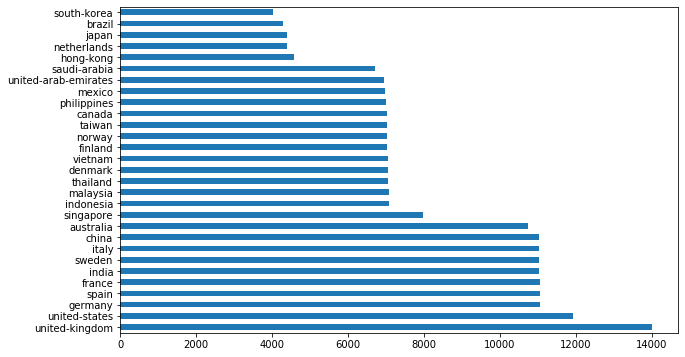

In [345]:
all_data['country'].value_counts()
all_data['country'].value_counts().plot(kind='barh', figsize=(10,6))

I also checked this website for confirmed Covid-19 cases population percetange rating for these countries:
https://ourworldindata.org/, and below is the list of country names in descending order of the confirmed cases population percentage.

In [522]:
total_country_order = list(total_order.index)
daily_country_order = list(daily_order.index)

In [523]:
us_data = all_data[all_data['country']=='united-states']
uk_data = all_data[all_data['country']=='united-kindom']
china_data = all_data[all_data['country']=='china']
top10_data = all_data.loc[all_data['country'].apply(lambda x: x in total_country_order[:10])]
bottom10_data = all_data.loc[all_data['country'].apply(lambda x: x in total_country_order[-10:])]

In [527]:
all_data['country'].value_counts()

united-kingdom          13992
united-states           11910
germany                 11058
spain                   11056
france                  11052
india                   11039
sweden                  11036
italy                   11033
china                   11015
australia               10732
singapore                7979
indonesia                7087
malaysia                 7086
thailand                 7054
denmark                  7042
vietnam                  7040
finland                  7031
norway                   7022
taiwan                   7020
canada                   7017
philippines              6997
mexico                   6978
united-arab-emirates     6949
saudi-arabia             6710
hong-kong                4574
netherlands              4397
japan                    4389
brazil                   4298
south-korea              4019
Name: country, dtype: int64

In [525]:
total_order.shape

(28,)

In [477]:
print(top10_data.shape)
print(bottom10_data.shape)

(85321, 259)
(72439, 259)


#### Q: how much confidence do you have in NHS to respond to Covid-19 outbreak

From the response we can tell more people feel better in countries with less percentage of confirmed cases

In [528]:
all_data['WCRex1'].value_counts()

                  114199
Somewhat well      34397
Very well          20645
Somewhat badly     13974
Very badly         12025
Don't know          5315
Name: WCRex1, dtype: int64

Text(0.5, 1.0, 'bottom10 data')

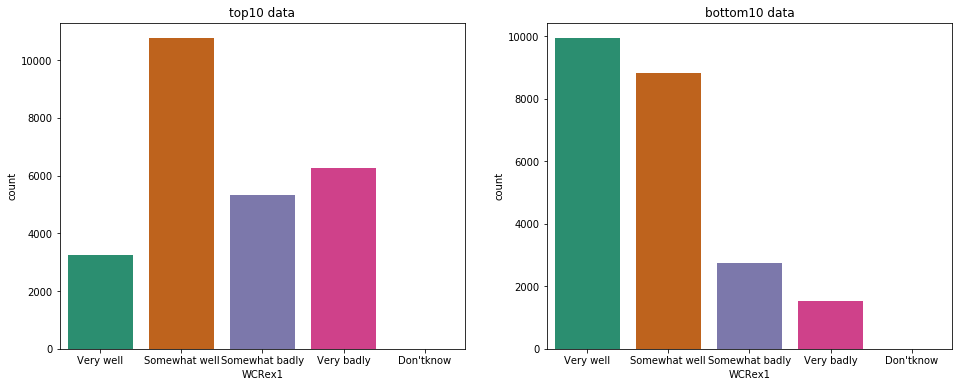

In [529]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
#order=['Always', 'Frequently', 'Sometimes', 'Rarely', 'Not at all']
order=['Very well', 'Somewhat well', 'Somewhat badly', 'Very badly', "Don'tknow"]
sns.countplot(x='WCRex1', data = top10_data, order = order, palette = 'Dark2', ax = ax[0])
sns.countplot(x='WCRex1', data = bottom10_data, order = order, palette = 'Dark2', ax = ax[1])
ax[0].set_title('top10 data')
ax[1].set_title('bottom10 data')

#### Q: little interests in doing things?

Text(0.5, 1.0, 'bottom10 data')

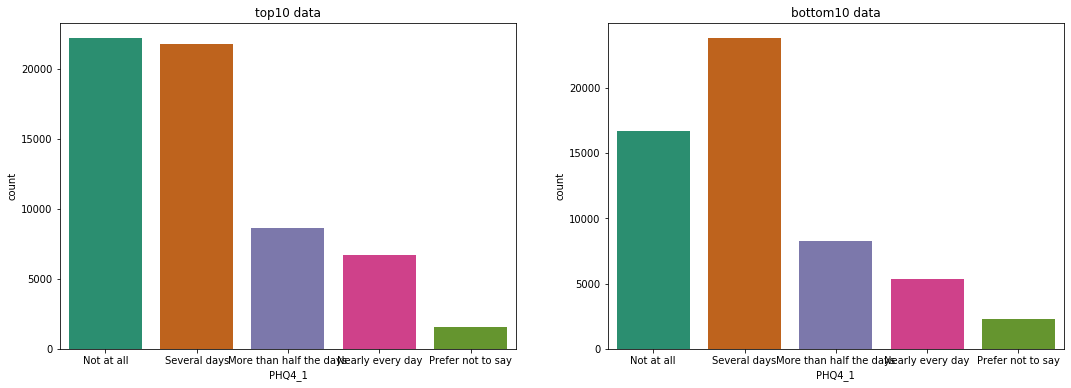

In [530]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
#order=['Always', 'Frequently', 'Sometimes', 'Rarely', 'Not at all']
order=['Not at all', 'Several days', 'More than half the days', 'Nearly every day', 'Prefer not to say']
sns.countplot(x='PHQ4_1', data = top10_data, order = order, palette = 'Dark2', ax = ax[0])
sns.countplot(x='PHQ4_1', data = bottom10_data, order = order, palette = 'Dark2', ax = ax[1])
ax[0].set_title('top10 data')
ax[1].set_title('bottom10 data')

#### Q: You government advsing wearing a mask(attribute: m1_1)

Though at current stage people are all aware of the imporatnce of wearing a mask, there are somehow still more people not willing to wear mask in the top rated countries. The difference attitude is more obvious in the comparison of US vs China. Less percentage of people in US is willing to wear mask.

Text(0.5, 1.0, 'bottom10 data')

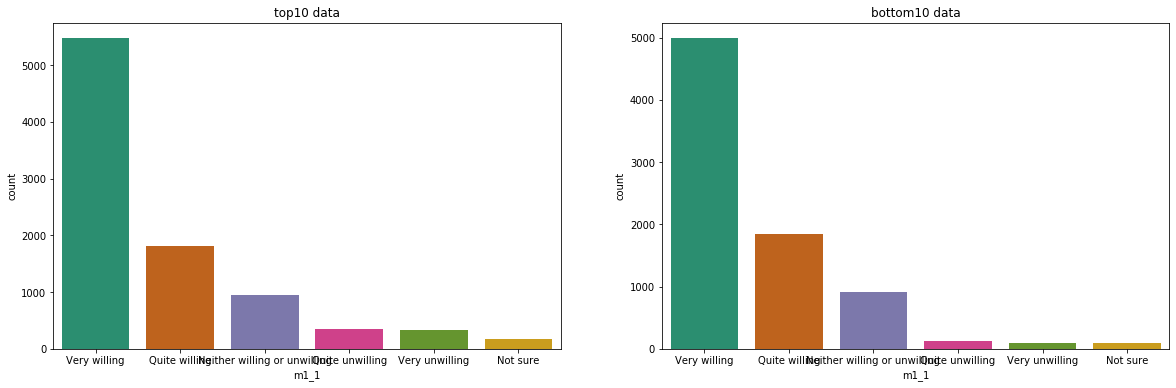

In [531]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
#order=['Always', 'Frequently', 'Sometimes', 'Rarely', 'Not at all']
order=['Very willing', 'Quite willing', 'Neither willing or unwilling', 'Quite unwilling', 'Very unwilling', 'Not sure']
sns.countplot(x='m1_1', data = top10_data, order = order, palette = 'Dark2', ax = ax[0])
#sns.countplot(x='m1_1', data = all_data[all_data['country']=='united-kingdom'], order = order, palette = 'Dark2', ax = ax[0])
sns.countplot(x='m1_1', data = bottom10_data, order = order, palette = 'Dark2', ax = ax[1])
ax[0].set_title('top10 data')
ax[1].set_title('bottom10 data')

Text(0, 0.5, 'percentage of response')

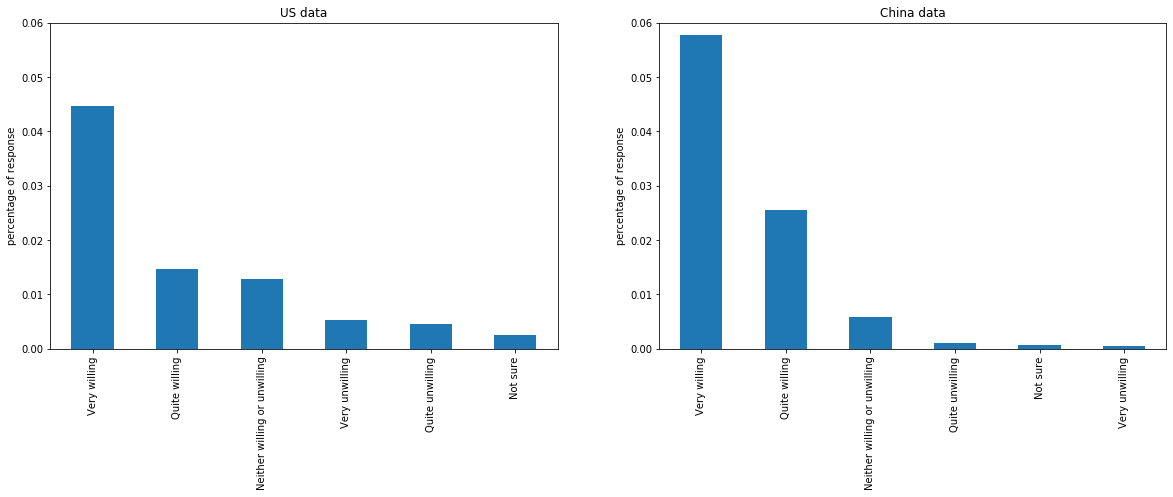

In [377]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
#order=['Always', 'Frequently', 'Sometimes', 'Rarely', 'Not at all']
order=['Very willing', 'Quite willing', 'Neither willing or unwilling', 'Quite unwilling', 'Very unwilling', 'Not sure']
us_data['m1_1'].value_counts().apply(lambda x: x/us_data.shape[0])[1:].plot(kind = 'bar', ax = ax[0], ylim=(0,0.06))
china_data['m1_1'].value_counts().apply(lambda x: x/china_data.shape[0])[1:].plot(kind = 'bar', ax = ax[1], ylim = (0,0.06))
ax[0].set_title('US data')
ax[0].set_ylabel('percentage of response')
ax[1].set_title('China data')
ax[1].set_ylabel('percentage of response')

#### Q: how many days did you wear a face mask or covering(in past 7 days?)

In [330]:
all_data['m3'].value_counts().sort_values()

4      4072
6      4650
1      6743
3      6898
5      7996
2      8468
7     13778
0     16899
     154547
Name: m3, dtype: int64

(0, 5500)

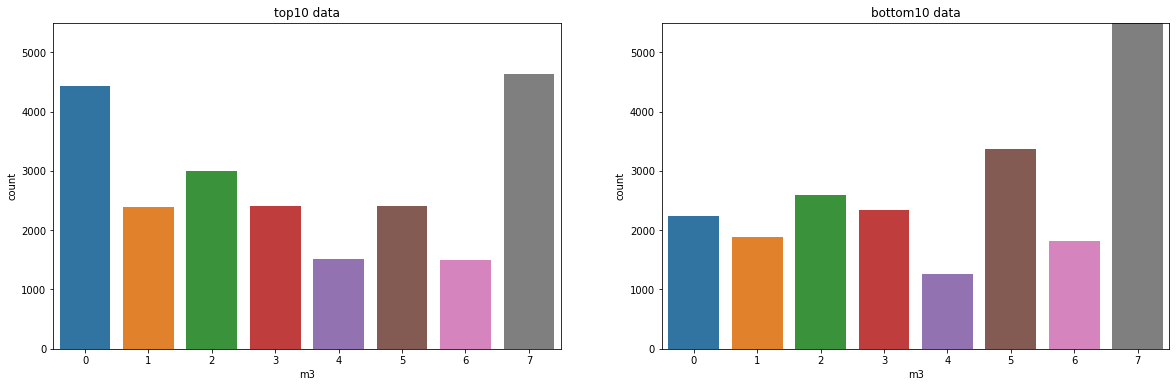

In [532]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
#order=['Always', 'Frequently', 'Sometimes', 'Rarely', 'Not at all']
order=['0','1','2','3','4','5','6','7']
sns.countplot(x='m3', data = top10_data, order = order, ax = ax[0])
#sns.countplot(x='m1_1', data = all_data[all_data['country']=='united-kingdom'], order = order, palette = 'Dark2', ax = ax[0])
sns.countplot(x='m3', data = bottom10_data, order = order, ax = ax[1])
ax[0].set_title('top10 data')
ax[1].set_title('bottom10 data')
ax[0].set_ylim(0,5500)
ax[1].set_ylim(0,5500)

In [574]:
all_data['m3'] = all_data['m3'].apply(lambda x: 0 if x== ' ' else x)
all_data['m3'] = all_data['m3'].astype(float)